<a href="https://colab.research.google.com/github/2303A51621/2303A51621-batch-22/blob/main/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = {
    "OrderID": [1, 2, 3, 4, 5],
    "Product": ["Laptop", "Phone", "Tablet", "Laptop", "Phone"],
    "Quantity": [2, 5, 3, 1, 10],
    "Price": [500, 200, 300, 600, 150]
}

df = pd.DataFrame(data)
df["TotalSale"] = df["Quantity"] * df["Price"]
high_sales = df[df["TotalSale"] > 1000]
most_sold = df.groupby("Product")["Quantity"].sum().idxmax()
df["Discount"] = df["TotalSale"].apply(lambda x: 0.1*x if x > 1000 else 0.05*x)
df.to_excel("sales_summary.xlsx", index=False)

print(df)
print("Orders with sale > 1000:\n", high_sales)
print("Most sold product:", most_sold)


   OrderID Product  Quantity  Price  TotalSale  Discount
0        1  Laptop         2    500       1000      50.0
1        2   Phone         5    200       1000      50.0
2        3  Tablet         3    300        900      45.0
3        4  Laptop         1    600        600      30.0
4        5   Phone        10    150       1500     150.0
Orders with sale > 1000:
    OrderID Product  Quantity  Price  TotalSale
4        5   Phone        10    150       1500
Most sold product: Phone


  Department  Budget  Expenses  Variance
2    Finance    8000      9000     -1000
0         HR    5000      5500      -500
3  Marketing   10000      9500       500
1         IT   12000     11000      1000
Departments exceeding budget:
   Department  Budget  Expenses  Variance
0         HR    5000      5500      -500
2    Finance    8000      9000     -1000


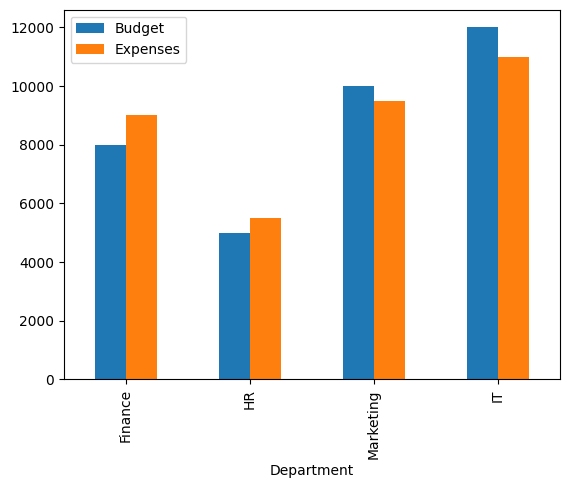

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

budget = pd.DataFrame({"Department":["HR","IT","Finance","Marketing"],"Budget":[5000,12000,8000,10000]})
expenses = pd.DataFrame({"Department":["HR","IT","Finance","Marketing"],"Expenses":[5500,11000,9000,9500]})

df = pd.merge(budget, expenses, on="Department")
df["Variance"] = df["Budget"] - df["Expenses"]
exceeding = df[df["Expenses"] > df["Budget"]]
df = df.sort_values("Variance")

print(df)
print("Departments exceeding budget:\n", exceeding)

df.plot(x="Department", y=["Budget","Expenses"], kind="bar")
plt.show()
